In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!pip install pykrx
!pip install yfinance
!pip install finance-datareader

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense, LSTM, Dropout
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pykrx import stock
import FinanceDataReader as fdr

In [ ]:
import yfinance as yf
import pandas as pd

df =  yf.download(['^KS11'], start='2017-01-01', end='2022-05-16')
df = df.dropna()

df

df = df.reset_index()
df['year'] = pd.to_datetime(df['Date']).dt.year
df['month'] = pd.to_datetime(df['Date']).dt.month
df['day'] = pd.to_datetime(df['Date']).dt.day

df1 = df.sort_values(by=['year','month','day'], ascending=True).drop_duplicates(subset=['year', 'month'], keep='last')
df2 = df1.drop(["year", "month", "day"], axis=1)
df2 = df2.set_index("Date")

df2

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-31,2077.659912,2079.969971,2067.570068,2067.570068,2067.570068,288300
2017-02-28,2087.260010,2094.409912,2084.360107,2091.639893,2091.639893,399800
2017-03-31,2166.620117,2166.929932,2159.800049,2160.229980,2160.229980,441600
2017-04-28,2214.360107,2217.040039,2202.199951,2205.439941,2205.439941,268600
2017-05-31,2339.250000,2355.229980,2338.250000,2347.379883,2347.379883,555900
...,...,...,...,...,...,...
2022-01-28,2617.870117,2668.590088,2591.530029,2663.340088,2663.340088,433700
2022-02-28,2663.000000,2699.179932,2658.250000,2699.179932,2699.179932,613300
2022-03-31,2743.239990,2765.199951,2743.199951,2757.649902,2757.649902,1029500


In [ ]:
df = df.drop(['year', 'month', 'day'], axis=1)
df= df.set_index("Date")

In [ ]:
df3 = df.pct_change()

In [ ]:
df3.dropna()

,시가,고가,저가,종가,수정종가,거래량
Date,,,,,,
2017-01-03,0.005974,0.006044,0.006345,0.008790,0.008790,0.166159
2017-01-04,0.005889,0.001086,0.005985,0.000817,0.000817,0.385677
2017-01-05,-0.000376,0.000103,-0.000549,-0.001804,-0.001804,0.457066
2017-01-06,0.001266,0.002609,0.003025,0.003511,0.003511,-0.158692
2017-01-09,0.002475,0.000653,0.000396,-0.000166,-0.000166,-0.125384
...,...,...,...,...,...,...
2022-05-10,-0.022921,-0.018760,-0.031472,-0.018132,-0.018132,-0.369451
2022-05-11,-0.001394,-0.001398,0.010215,-0.001652,-0.001652,-0.192175
2022-05-12,-0.006580,-0.002901,-0.012520,-0.016275,-0.016275,0.324746


In [ ]:
df.columns = ['시가', '고가', '저가', '종가', '수정종가', '거래량']
df3.columns = ['시가x', '고가x', '저가x', '종가x', '수정종가x', '거래량x']

In [ ]:
df5 = pd.concat([df, df3], axis=1)

In [ ]:
df5

,시가,고가,저가,종가,수정종가,거래량,시가x,고가x,저가x,종가x,수정종가x,거래량x
Date,,,,,,,,,,,,
2017-01-02,2022.229980,2031.790039,2015.680054,2026.160034,2026.160034,229900,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,2034.310059,2044.069946,2028.469971,2043.969971,2043.969971,268100,0.005974,0.006044,0.006345,0.008790,0.008790,0.166159
2017-01-04,2046.290039,2046.290039,2040.609985,2045.640015,2045.640015,371500,0.005889,0.001086,0.005985,0.000817,0.000817,0.385677
2017-01-05,2045.520020,2046.500000,2039.489990,2041.949951,2041.949951,541300,-0.000376,0.000103,-0.000549,-0.001804,-0.001804,0.457066
2017-01-06,2048.110107,2051.840088,2045.660034,2049.120117,2049.120117,455400,0.001266,0.002609,0.003025,0.003511,0.003511,-0.158692
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-10,2590.129883,2602.750000,2553.010010,2596.560059,2596.560059,840900,-0.022921,-0.018760,-0.031472,-0.018132,-0.018132,-0.369451
2022-05-11,2586.520020,2599.110107,2579.090088,2592.270020,2592.270020,679300,-0.001394,-0.001398,0.010215,-0.001652,-0.001652,-0.192175
2022-05-12,2569.500000,2591.570068,2546.800049,2550.080078,2550.080078,899900,-0.006580,-0.002901,-0.012520,-0.016275,-0.016275,0.324746


In [ ]:
df4.dropna()

,시가,고가,저가,종가,수정종가,거래량
Date,,,,,,
2017-02-28,0.004621,0.006942,0.008121,0.011642,0.011642,0.386750
2017-03-31,0.038021,0.034626,0.036193,0.032792,0.032792,0.104552
2017-04-28,0.022034,0.023125,0.019631,0.020928,0.020928,-0.391757
2017-05-31,0.056400,0.062331,0.061779,0.064359,0.064359,1.069620
2017-06-30,0.018339,0.015531,0.018454,0.018919,0.018919,-0.382083
...,...,...,...,...,...,...
2022-01-28,-0.127304,-0.112056,-0.129114,-0.105556,-0.105556,-0.058402
2022-02-28,0.017239,0.011463,0.025745,0.013457,0.013457,0.414111
2022-03-31,0.030131,0.024459,0.031957,0.021662,0.021662,0.678624


In [ ]:
df4 = df2.pct_change()

In [ ]:
window_size = 10 
data_size = 6

def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

[[0.6455945524718222, 0.6395380170432958, 0.6459771962210504, 0.6548331108927696, 0.6548331108927696, 0.21847583529483022], [0.6524977875770485, 0.6554384389659362, 0.6598186857385261, 0.6697500338745567, 0.6697500338745567, 0.2417387582918032], [0.6525141879772173, 0.6519981665991332, 0.6618607217683029, 0.6656364696378663, 0.6656364696378663, 0.21068076911319014], [0.6639559338218577, 0.6587730133570445, 0.6686547929444154, 0.6618531269568293, 0.6618531269568293, 0.21364595115091206], [0.6641143376869034, 0.6553994976064698, 0.6615266086843276, 0.6602889682716476, 0.6602889682716476, 0.3045578210497263], [0.642508743844927, 0.6312127071682299, 0.6446840207373649, 0.6423951620542628, 0.6423951620542628, 0.3513587870265536], [0.6093248674934896, 0.6035579647906044, 0.5999860040495092, 0.6164421791831193, 0.6164421791831193, 0.20074588084247239], [0.6073533527219701, 0.6015350493610375, 0.6140376954206039, 0.6141201891167163, 0.6141201891167163, 0.151346559471765], [0.5980579259140637, 

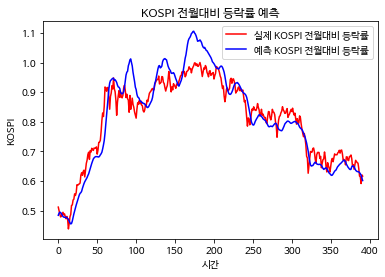

 2022 5월 KOSPI 예측 : [2533.4048] 포인트
 2022 6월 KOSPI 예측 : [2646.9487] 포인트
 2022 7월 KOSPI 예측 : [2888.8618] 포인트
 2022 8월 KOSPI 예측 : [2744.6926] 포인트
 2022 9월 KOSPI 예측 : [2713.9683] 포인트


In [ ]:
dfx = df5[['시가', '고가', '저가', '종가', '수정종가', '거래량']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['종가']]

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 전월대비 등락률(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 전월대비 등락률
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=10, activation='relu', return_sequences=True, input_shape=(window_size, data_size)))
model.add(Dropout(0.1))
model.add(LSTM(units=10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_x, train_y, epochs=60, batch_size=30)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='실제 KOSPI 전월대비 등락률')
plt.plot(pred_y, color='blue', label='예측 KOSPI 전월대비 등락률')
plt.title('KOSPI 전월대비 등락률 예측')
plt.xlabel('시간')
plt.ylabel('KOSPI')
plt.legend()
plt.show()

# df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print(" 2022 5월 KOSPI 예측 :", df2.종가[-1] * pred_y[-1] / dfy.종가[-1], '포인트')
print(" 2022 6월 KOSPI 예측 :", df2.종가[-2] * pred_y[-2] / dfy.종가[-2], '포인트')
print(" 2022 7월 KOSPI 예측 :", df2.종가[-3] * pred_y[-3] / dfy.종가[-3], '포인트')
print(" 2022 8월 KOSPI 예측 :", df2.종가[-4] * pred_y[-4] / dfy.종가[-4], '포인트')
print(" 2022 9월 KOSPI 예측 :", df2.종가[-5] * pred_y[-5] / dfy.종가[-5], '포인트')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 혹시 5회 이상 검증데이터 loss가 증가하면, 과적합될 수 있으므로 학습을 조기종료!
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
# 훈련을 거듭하면서, 가장 검증데이터 정확도가 높았던 순간을 체크포인트로 저장
model_check = ModelCheckpoint('the_best.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
# 긍정/부정을 판단하니까 손실함수는 이진 교차 엔트로피, 최적화는 adam, 평가 기준은 acc (출력할때 뜬다)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=1, batch_size=64, callbacks=[early_stop, model_check])

1/3 [=========>....................] - ETA: 4s - loss: 0.6618 - acc: 0.0000e+00
Epoch 1: val_acc improved from -inf to 0.01667, saving model to the_best.h5
3/3 [==============================] - 3s 221ms/step - loss: 0.6502 - acc: 0.0000e+00 - val_loss: 0.6458 - val_acc: 0.0167


In [ ]:
# 정확도 측정
print(model.evaluate(test_x, test_y))

2/2 [==============================] - 0s 7ms/step - loss: 0.6458 - acc: 0.0167
[0.6457505822181702, 0.01666666753590107]
